In [ ]:
import numpy as np
import os
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import librosa

In [ ]:
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers import LeakyReLU
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!unzip allData_threeEmotions.zip

Archive:  allData_threeEmotions.zip
  inflating: x_data.npy              
  inflating: y_data.npy              


In [ ]:
# load X and Y from npy files
x_path = './x_data.npy'
y_path = './y_data.npy'
X = np.load(x_path)
Y = np.load(y_path)

print(X.shape)
print(Y.shape)

(5768, 40)
(5768,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=42, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.18, random_state=42) # 0.18 x 0.85 = 0.15

In [ ]:
print(X_train.shape, X_val.shape)

(4614, 40) (1154, 40)


In [ ]:
# count occurences of each emotion
train_count = [0]*3
val_count = [0]*3

for e in y_train:
    train_count[e] += 1

for e in y_val:
    val_count[e] += 1

print(train_count, val_count)

[1546, 1530, 1538] [377, 392, 385]


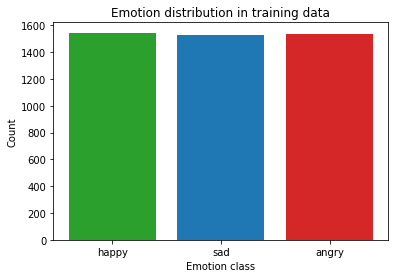

In [ ]:
from matplotlib import pyplot

fig = plt.figure()
c = ['tab:green', 'tab:blue', 'tab:red']

emos = ['happy', 'sad', 'angry']
plt.bar(emos, train_count, color=c)
plt.xlabel("Emotion class")
plt.ylabel("Count")
plt.title("Emotion distribution in training data")
plt.show()

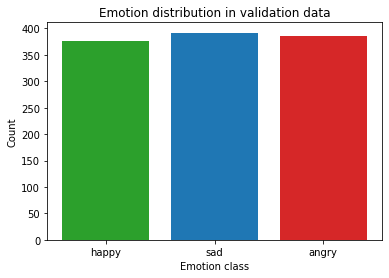

In [ ]:
from matplotlib import pyplot

fig = plt.figure()

plt.bar(emos, val_count, color=c)
plt.xlabel("Emotion class")
plt.ylabel("Count")
plt.title("Emotion distribution in validation data")
plt.show()

In [ ]:
#####################################################
#                 Baseline Model                    #
#####################################################

#Create a Gaussian Classifier
clf=RandomForestClassifier(criterion='entropy')
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred=clf.predict(X_2)

In [ ]:
# Report useful metrics
ascore = sklearn.metrics.accuracy_score(Y_2, y_pred)
rscore = sklearn.metrics.recall_score(Y_2, y_pred, average='macro')
pscore = sklearn.metrics.precision_score(Y_2, y_pred, average='macro')
fscore = sklearn.metrics.f1_score(Y_2, y_pred, average='macro')
print('Accuracy:{}, Precision:{}, Recall:{}, F1:{}'.format(ascore, pscore, rscore, fscore))

Accuracy:0.4861111111111111, Precision:0.5795965586180559, Recall:0.4861111111111111, F1:0.4576262123523276


In [ ]:
!pip install neural-structured-learning

     |████████████████████████████████| 120 kB 7.4 MB/s 


In [ ]:
import neural_structured_learning as nsl
import keras.layers as layers

In [ ]:
#####################################################
#                 Model Section                     #
#####################################################

x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)

print(x_traincnn.shape, x_valcnn.shape)

# model = Sequential()
# model.add(BatchNormalization())
# model.add(Conv1D(64, 5, padding='same',
#                     input_shape=(40, 1)))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(3))
# model.add(Activation('softmax'))
model = Sequential()
model.add(BatchNormalization())
model.add(Conv1D(32, 3, padding='same',
                    input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(tf.keras.layers.MaxPool1D())
model.add(Conv1D(64, 3, padding='same'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.MaxPool1D())
model.add(Conv1D(128, 3, padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

history = model.fit(x_traincnn, y_train,
                        batch_size=64, epochs=60,
                        validation_data=(x_valcnn, y_val))

(4614, 40, 1) (1154, 40, 1)
<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4f698caa10>>
Epoch 1/60
73/73 [==============================] - 3s 20ms/step - loss: 0.9307 - accuracy: 0.5479 - val_loss: 1.1699 - val_accuracy: 0.5321
Epoch 2/60
73/73 [==============================] - 1s 18ms/step - loss: 0.7827 - accuracy: 0.6385 - val_loss: 0.8037 - val_accuracy: 0.6490
Epoch 3/60
73/73 [==============================] - 1s 16ms/step - loss: 0.7504 - accuracy: 0.6569 - val_loss: 0.8357 - val_accuracy: 0.6395
Epoch 4/60
73/73 [==============================] - 1s 18ms/step - loss: 0.7258 - accuracy: 0.6686 - val_loss: 0.8238 - val_accuracy: 0.6447
Epoch 5/60
73/73 [==============================] - 1s 18ms/step - loss: 0.7111 - accuracy: 0.6784 - val_loss: 0.7589 - val_accuracy: 0.6690
Epoch 6/60
73/73 [==============================] - 1s 17ms/step - loss: 0.6971 - accuracy: 0.6944 - val_loss: 0.7322 - val_accuracy: 0.6698
Epoch 7/60
73/73 [==============

In [ ]:
#####################################################
#                 Model Section                     #
#####################################################

x_traincnn = np.expand_dims(X_train, axis=2)
x_valcnn = np.expand_dims(X_val, axis=2)

print(x_traincnn.shape, x_valcnn.shape)

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# model = Sequential([
#     LSTM(256, return_sequences=False, input_shape=(40,1)),
#     Dropout(0.2),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(3, activation='softmax')
# ])
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128),
    LeakyReLU(0.1),
    Dropout(0.2),
    Dense(64),
    LeakyReLU(0.1),
    Dropout(0.2),
    Dense(3, activation='softmax')
])


# rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

history = model.fit(x_traincnn, y_train,
                        batch_size=256, epochs=60,
                        validation_data=(x_valcnn, y_val))

(4614, 40, 1) (1154, 40, 1)
Epoch 1/60
19/19 [==============================] - 3s 64ms/step - loss: 1.0881 - accuracy: 0.3806 - val_loss: 1.0654 - val_accuracy: 0.4298
Epoch 2/60
19/19 [==============================] - 1s 27ms/step - loss: 1.0699 - accuracy: 0.3888 - val_loss: 1.0438 - val_accuracy: 0.4255
Epoch 3/60
19/19 [==============================] - 1s 26ms/step - loss: 1.0548 - accuracy: 0.3936 - val_loss: 1.0240 - val_accuracy: 0.4428
Epoch 4/60
19/19 [==============================] - 0s 26ms/step - loss: 1.0344 - accuracy: 0.4241 - val_loss: 1.0021 - val_accuracy: 0.4705
Epoch 5/60
19/19 [==============================] - 1s 27ms/step - loss: 1.0201 - accuracy: 0.4339 - val_loss: 0.9768 - val_accuracy: 0.4931
Epoch 6/60
19/19 [==============================] - 1s 27ms/step - loss: 0.9964 - accuracy: 0.4551 - val_loss: 0.9437 - val_accuracy: 0.4991
Epoch 7/60
19/19 [==============================] - 1s 27ms/step - loss: 0.9574 - accuracy: 0.4993 - val_loss: 0.8895 - val_ac

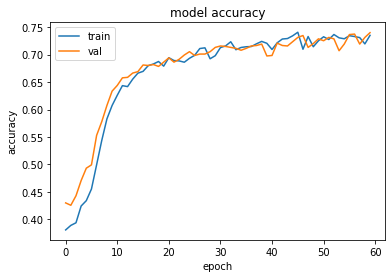

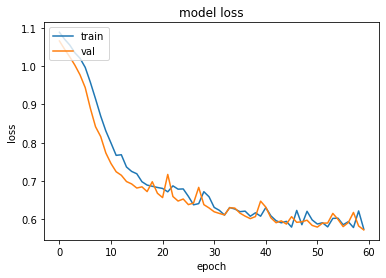

In [ ]:
# Model plots
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
voice_model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])


# rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

voice_model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

voice_model.fit(x_traincnn, y_train, batch_size=64, epochs=60, validation_data=(x_valcnn, y_val))

Epoch 1/60
73/73 [==============================] - 4s 23ms/step - loss: 0.9826 - accuracy: 0.4612 - val_loss: 0.8139 - val_accuracy: 0.6057
Epoch 2/60
73/73 [==============================] - 1s 15ms/step - loss: 0.7602 - accuracy: 0.6452 - val_loss: 0.8039 - val_accuracy: 0.6516
Epoch 3/60
73/73 [==============================] - 1s 15ms/step - loss: 0.7182 - accuracy: 0.6671 - val_loss: 0.6940 - val_accuracy: 0.6820
Epoch 4/60
73/73 [==============================] - 1s 16ms/step - loss: 0.6861 - accuracy: 0.6797 - val_loss: 0.6666 - val_accuracy: 0.6984
Epoch 5/60
73/73 [==============================] - 1s 15ms/step - loss: 0.6753 - accuracy: 0.6860 - val_loss: 0.6265 - val_accuracy: 0.7045
Epoch 6/60
73/73 [==============================] - 1s 16ms/step - loss: 0.6462 - accuracy: 0.7024 - val_loss: 0.6176 - val_accuracy: 0.6984
Epoch 7/60
73/73 [==============================] - 1s 15ms/step - loss: 0.6151 - accuracy: 0.7211 - val_loss: 0.6092 - val_accuracy: 0.7184
Epoch 8/60
73

In [ ]:
# Create np arrays for data and labels
x_testcnn = np.expand_dims(X_test, axis=2)
results = model.evaluate(x_testcnn, y_test, batch_size=64)

14/14 [==============================] - 1s 49ms/step - loss: 0.6176 - accuracy: 0.7517


In [ ]:
index_to_emotion = {
    0:"happy",
    1:"sad",
    2:"angry",
    3:"disgust",
    4:"fear",
    5:"neutral"
}

In [ ]:
! pip install pydub
! pip install noisereduce
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d tli725/jl-corpus

 99% 1.18G/1.20G [00:23<00:00, 52.1MB/s]
100% 1.20G/1.20G [00:23<00:00, 55.1MB/s]


In [ ]:
!mkdir ./data

In [ ]:
%%capture
!unzip jl-corpus.zip -d ./data

In [ ]:
emotions = {
  'happy': 0, 
  'sad': 1, 
  'angry': 2
}

processed_data = []

data_path = "/content/data/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)"
for file in os.listdir(data_path):
     filename = os.fsdecode(file)
     file_path = os.path.join(data_path, filename)

     if filename.endswith(".wav"):
         emotion_label = emotions.get(filename.split('_')[1], None)
         if (emotion_label != None):
            processed_data.append([file_path, emotion_label])         
     else:
         continue

In [ ]:
print(len(processed_data))

720


In [ ]:
def extract_feature(file_name): 

    y, sample_rate = librosa.load(file_name, sr=None)

    # Don't process corrupted audio signals
    if not np.any(y):
        return None
  
    result=np.array([])
    
    mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))

    # chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    # result=np.hstack((result, chroma))

    # mel=np.mean(librosa.feature.melspectrogram(y, sr=sample_rate).T,axis=0)
    # result=np.hstack((result, mel))

    return result

# Obtain features from each wav file
labels = []
features = []

i = 0 # partially save results?
for data in processed_data:
    i += 1
    result = extract_feature(data[0])
    if result is not None:
        labels.append(data[1])
        features.append(result)
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700


In [ ]:
# Create np arrays for data and labels
X_2 = np.array(features)
Y_2 = np.array(labels)
x_2cnn = np.expand_dims(X_2, axis=2)

In [ ]:
results = model.evaluate(x_2cnn, Y_2, batch_size=64)
# results = adv_model.evaluate({'feature': x_2cnn, 'label': Y_2})

12/12 [==============================] - 0s 8ms/step - loss: 0.9304 - accuracy: 0.6458


In [ ]:
out = model.predict(x_2cnn)

In [ ]:
out_r = out.argmax(axis=1)

In [ ]:
# Report useful metrics
ascore = sklearn.metrics.accuracy_score(Y_2, out_r)
rscore = sklearn.metrics.recall_score(Y_2, out_r, average='macro')
pscore = sklearn.metrics.precision_score(Y_2, out_r, average='macro')
fscore = sklearn.metrics.f1_score(Y_2, out_r, average='macro')
print('Accuracy:{}, Precision:{}, Recall:{}, F1:{}'.format(ascore, pscore, rscore, fscore))

Accuracy:0.6458333333333334, Precision:0.7023809523809524, Recall:0.6458333333333334, F1:0.629204761083319


In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_2, out_r)

print(cf_matrix)

[[104 125  11]
 [  0 240   0]
 [ 64  55 121]]


In [ ]:
val_c = model.predict(x_valcnn)
val_r = val_c.argmax(axis = 1)
cf_matrix = confusion_matrix(y_val, val_r)
print(cf_matrix)

[[270  40  67]
 [ 69 315   8]
 [ 80  16 289]]


In [ ]:
print(out[:15])

[[1.23329826e-01 1.19548617e-02 8.64715338e-01]
 [1.47495593e-03 9.98515904e-01 9.17840680e-06]
 [8.65745023e-02 9.12428319e-01 9.97046009e-04]
 [1.95749477e-01 7.40300864e-02 7.30220437e-01]
 [1.46135226e-01 7.15825319e-01 1.38039529e-01]
 [5.18367365e-02 9.36716080e-01 1.14472723e-02]
 [2.59526223e-01 4.81508760e-05 7.40425646e-01]
 [5.78672588e-01 2.19905898e-01 2.01421529e-01]
 [3.73481303e-01 5.74468315e-01 5.20504117e-02]
 [1.98799253e-01 9.34490818e-05 8.01107347e-01]
 [9.86068919e-02 2.05046814e-02 8.80888402e-01]
 [2.31896296e-01 3.93711209e-01 3.74392450e-01]
 [1.48093759e-03 9.97968853e-01 5.50202793e-04]
 [9.62466281e-03 9.44210708e-01 4.61646281e-02]
 [3.18706222e-02 9.60758567e-01 7.37081096e-03]]


In [ ]:
# count occurences of each emotion
JL_count = [0]*3

for e in Y_2:
    JL_count[e] += 1

print(JL_count)

[240, 240, 240]


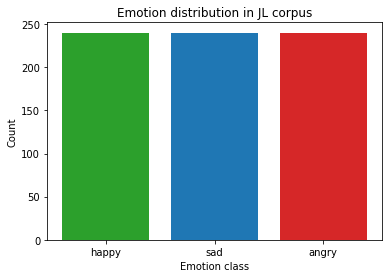

In [ ]:
fig = plt.figure()
c = ['tab:green', 'tab:blue', 'tab:red']

emos = ['happy', 'sad', 'angry']
plt.bar(emos, JL_count, color=c)
plt.xlabel("Emotion class")
plt.ylabel("Count")
plt.title("Emotion distribution in JL corpus")
plt.show()

In [ ]:
new_features = []
new_features.append(extract_feature('Angry_second.wav'))
new_features.append(extract_feature('Sad.wav'))
new_features.append(extract_feature('Happy.wav'))

X_3 = np.array(new_features)
x_3cnn = np.expand_dims(X_3, axis=2)

In [ ]:
results = model.predict(x_3cnn)

In [ ]:
print(results)

[[0.13308212 0.8156562  0.05126164]
 [0.02110085 0.9755574  0.00334177]
 [0.0570318  0.93281215 0.01015611]]


In [ ]:
results_voice = voice_model.predict(x_3cnn)
print(results_voice)

[[0.40493795 0.02970882 0.5653532 ]
 [0.15231666 0.8279536  0.01972983]
 [0.8713068  0.05056087 0.07813232]]
